In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
import sacc

In [4]:
# Define matplolib colors: black, purple, green, red
colors = ['#000000', '#800080', '#008000', '#ff0000', "#E69F00", "#56B4E9", "#009E73", "#F0E442", '#800080', "#0072B2", "#CC79A7", "#D55E00"]

# Matplotlib style
plt.rcParams['figure.figsize'] = 8., 6.
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.bottom'] = 0.125
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.major.pad'] = 6.
plt.rcParams['xtick.minor.pad'] = 6.
plt.rcParams['ytick.major.pad'] = 6.
plt.rcParams['ytick.minor.pad'] = 6.
plt.rcParams['xtick.major.size'] = 4. # major tick size in points
plt.rcParams['xtick.minor.size'] = 3. # minor tick size in points
plt.rcParams['ytick.major.size'] = 4. # major tick size in points
plt.rcParams['ytick.minor.size'] = 3. # minor tick size in points
# Thickness of the axes lines
plt.rcParams['axes.linewidth'] = 1.5
# Smaller font size for axes ticks labels
plt.rcParams['xtick.labelsize'] = 13
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] =  'serif'
# plt.rcParams['font.serif'] = 'Computer Modern Roman Bold'
plt.rcParams['font.size'] = 18 

In [2]:
# Read the fiducial data vector
path = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/dndz'
fname = os.path.join(path, 'summary_statistics_fourier_all_SourcesS16A_LensesDR1_pz_mc_eab_HikageShearSC_DESC_GCandGGL_SC.sacc')
s = sacc.Sacc.load_fits(fname)

In [3]:
# Planck 2018 Cosmology
cosmo = ccl.Cosmology(Omega_c=0.264, Omega_b=0.0493, h=0.6736, sigma8=0.8111, n_s=0.9649)

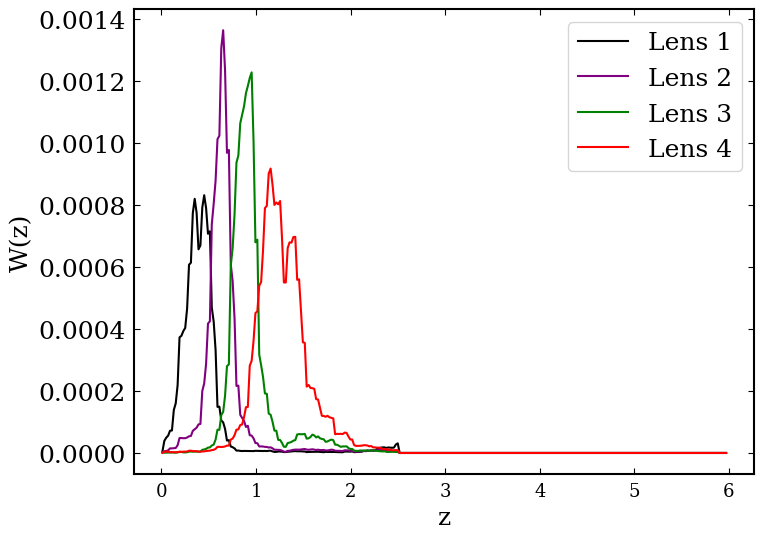

In [24]:
for i in range(4):
    # Extract the redshift distribution for a given tracer
    z = s.tracers[f'lens_{i}'].z
    nz = s.tracers[f'lens_{i}'].nz
    # Clustering kernel
    gc_kernel=ccl.get_density_kernel(cosmo, dndz=(z,nz))
    area = np.trapz(gc_kernel[1], gc_kernel[0])
    # Normalize the area of the kernel to 1
    plt.plot(z,gc_kernel[1]/area, color=colors[i], label=f'Lens {i+1}')
plt.xlabel('z')
plt.ylabel('W(z)')
plt.legend()
plt.show()
plt.close()

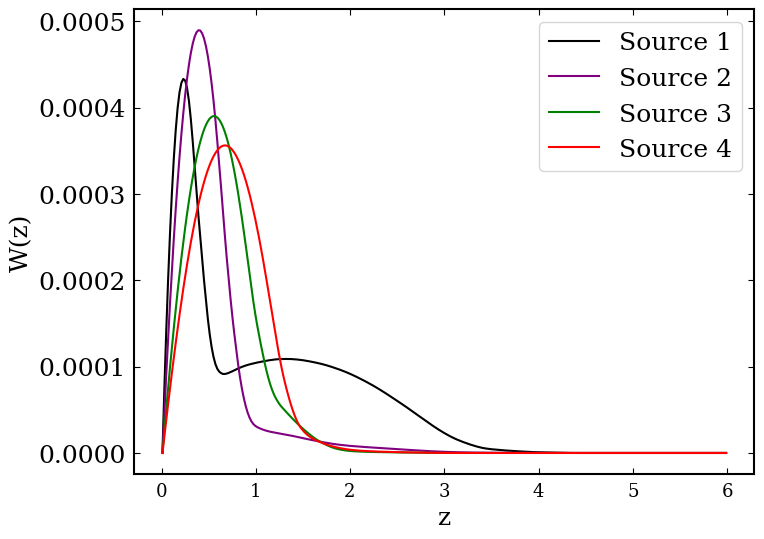

In [25]:
for i in range(4):

    # Extract the redshift distribution for a given tracer
    z = s.tracers[f'source_{i}'].z
    nz = s.tracers[f'source_{i}'].nz

    lensing_kernel = ccl.get_lensing_kernel(cosmo, dndz=(z,nz))
    area = np.trapz(lensing_kernel[1], lensing_kernel[0])
    # Normalize the area of the kernel to 1
    plt.plot(z,lensing_kernel[1]/area, color=colors[i], label=f'Source {i+1}')
plt.xlabel('z')
plt.ylabel('W(z)')
plt.legend()
plt.show()
plt.close()

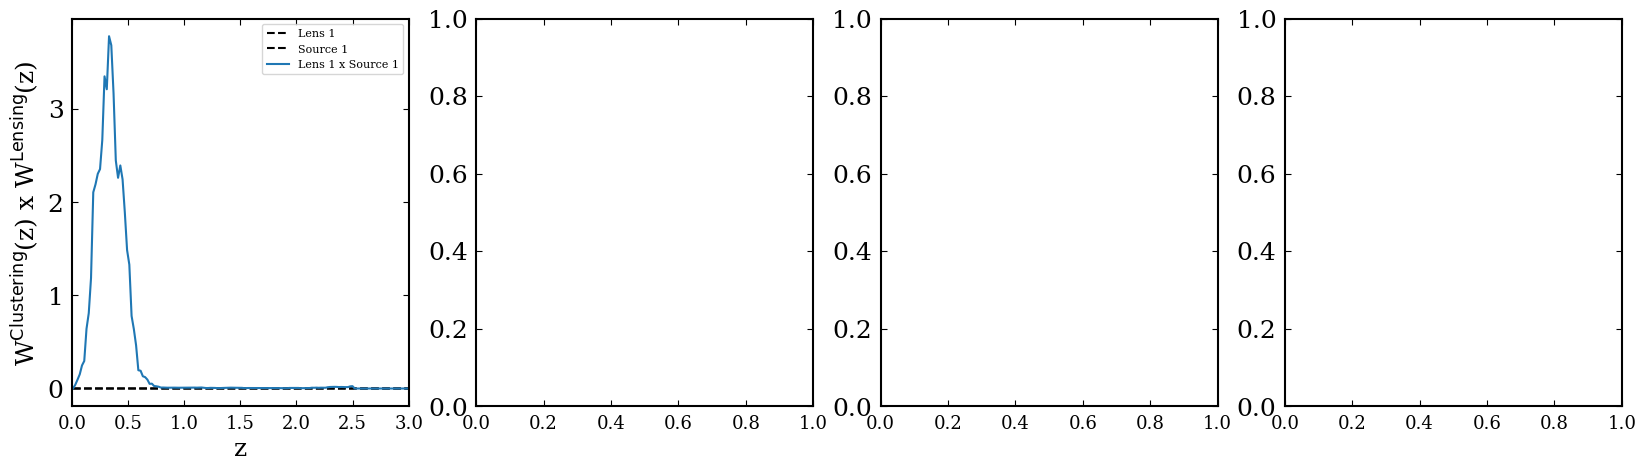

In [ ]:
# Initialize the figure with 1 row and 4 columns
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# Compute the product of the lensing and clustering kernels
cind = 0
for i in range(1):
    for j in range(1):
        z = s.tracers[f'lens_{i}'].z
        nz = s.tracers[f'lens_{i}'].nz
        gc_kernel=ccl.get_density_kernel(cosmo, dndz=(z,nz))
        area = np.trapz(gc_kernel[1], gc_kernel[0])
        ax[i].plot(z,gc_kernel[1]/np.max(gc_kernel[1]), color=colors[i], ls='--', label=f'Lens {i+1}')
        z = s.tracers[f'source_{j}'].z
        nz = s.tracers[f'source_{j}'].nz
        lensing_kernel = ccl.get_lensing_kernel(cosmo, dndz=(z,nz))
        area = np.trapz(lensing_kernel[1], lensing_kernel[0])
        ax[i].plot(z,lensing_kernel[1]/np.max(lensing_kernel[1]), color=colors[i], ls='--', label=f'Source {i+1}')
        # Pad a 0 to the end of the array to make it the same size as the lensing kernel
        gc_kernel = (gc_kernel[0], np.pad(gc_kernel[1], (0, len(lensing_kernel[1])-len(gc_kernel[1])), 'constant'))
        gc_lensing_kernel = gc_kernel[1]*lensing_kernel[1]
        area = np.trapz(gc_lensing_kernel, z)
        ax[i].plot(z,gc_lensing_kernel/np.max(gc_lensing_kernel), label=f'Lens {i+1} x Source {j+1}')
        cind += 1
    ax[i].set_xlim([0.0,3.0])
    ax[i].legend(fontsize=8)
    ax[i].set_xlabel('z')
ax[0].set_ylabel('W$^{\\text{Clustering}}$(z) x W$^{\\text{Lensing}}$(z)')
plt.show()
plt.close()